<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
import folium
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_context("poster")
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style("whitegrid")

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [3]:
# Read CSV
df = pd.read_csv('../../Data Folder/Sacramento_transactions.csv')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [4]:
# ANSWER
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df.shape

(985, 12)

In [6]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [11]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [12]:
df.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879


In [80]:
df.dtypes.value_counts()

object     6
int64      5
float64    2
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [85]:
#df['street'].unique()

In [5]:
df['street_names']=df.street.apply(lambda x:''.join(filter(str.isalpha, str(x))))

In [5]:
df['street_names'].value_counts()

street_names
CRYSTALWOODCIR    33
THAVE             17
THST              13
STST               9
EST                9
                  ..
TIGERWOODSDR       1
RIVEROAKWAY        1
WRINGERDR          1
ROCKPORTECT        1
YELLOWSTONELN      1
Name: count, Length: 837, dtype: int64

In [75]:
df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

<Axes: ylabel='city'>

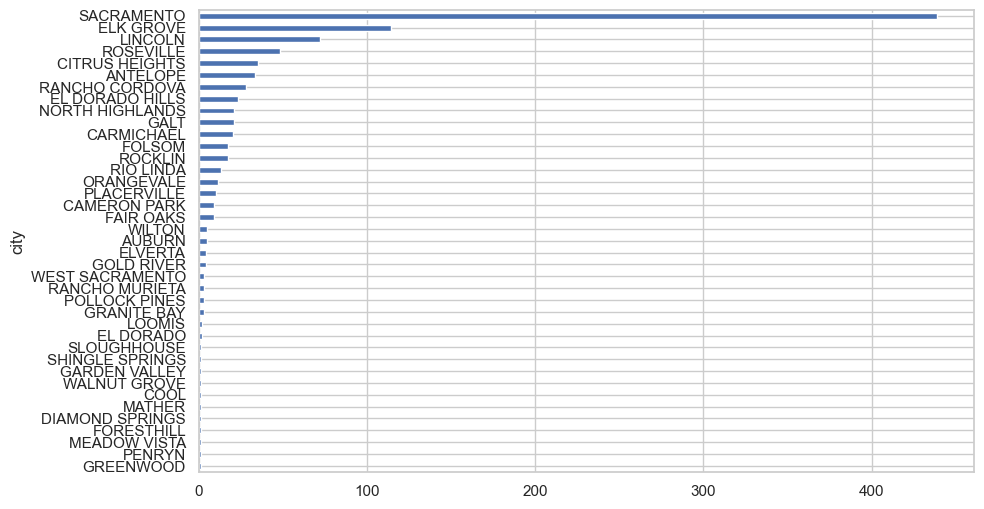

In [20]:
df['city'].value_counts().sort_values().plot(kind = 'barh')

In [21]:
df['price'].max()

884790

In [22]:
df[df['price']==884790]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858,BARRELRACERCT


In [23]:
df[df['city']=='WILTON']['price'].min()

372000

In [24]:
df[df['city']=='WILTON']['price'].max()

884790

In [25]:
df[df['city'] == 'WILTON']['price'].median()

579093.0

In [26]:
df[df['city'] =='WILTON']['price'].mean()

617508.4

In [27]:
df[df['zip']==95693]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
135,11215 SHARRMONT CT,WILTON,95693,CA,3,2,2110,Residential,Wed May 21 00:00:00 EDT 2008,372000,38.350620,-121.228349,SHARRMONTCT
327,9741 SADDLEBRED CT,WILTON,95693,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,560000,38.408841,-121.198039,SADDLEBREDCT
547,9360 MAGOS RD,WILTON,95693,CA,5,2,3741,Residential,Mon May 19 00:00:00 EDT 2008,579093,38.416809,-121.240628,MAGOSRD
552,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211,FURLONGDR
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858,BARRELRACERCT


In [19]:
#def sqft(df,columns):
   # if df([df['columns']==0])&([df['price']>=560000]):
                             # df['sq__ft']=3741

In [6]:
condition1 = (df['sq__ft']==0)
condition2 = (df['zip']==95693) 
df.loc[condition1 & condition2, 'sq__ft']= 3741

In [6]:
df[df['zip']==95693]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
135,11215 SHARRMONT CT,WILTON,95693,CA,3,2,2110,Residential,Wed May 21 00:00:00 EDT 2008,372000,38.350620,-121.228349,SHARRMONTCT
327,9741 SADDLEBRED CT,WILTON,95693,CA,0,0,3741,Residential,Tue May 20 00:00:00 EDT 2008,560000,38.408841,-121.198039,SADDLEBREDCT
547,9360 MAGOS RD,WILTON,95693,CA,5,2,3741,Residential,Mon May 19 00:00:00 EDT 2008,579093,38.416809,-121.240628,MAGOSRD
552,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211,FURLONGDR
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858,BARRELRACERCT


In [30]:
df[df['sq__ft'] == 3741]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
327,9741 SADDLEBRED CT,WILTON,95693,CA,0,0,3741,Residential,Tue May 20 00:00:00 EDT 2008,560000,38.408841,-121.198039,SADDLEBREDCT
547,9360 MAGOS RD,WILTON,95693,CA,5,2,3741,Residential,Mon May 19 00:00:00 EDT 2008,579093,38.416809,-121.240628,MAGOSRD


In [67]:
#df.street_names.unique()

In [20]:
#df['state'].unique()

In [107]:
#df['sq__ft'].unique()

In [31]:
df['zip'].value_counts()

zip
95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95619     1
95614     1
95690     1
95633     1
95722     1
Name: count, Length: 68, dtype: int64

In [32]:
df[df['zip']==95648]['price'].describe()

count        72.000000
mean      96539.263889
std      147978.894155
min        1551.000000
25%        4897.000000
50%        4897.000000
75%      209131.750000
max      512000.000000
Name: price, dtype: float64

In [33]:
df[df['zip']==95648]['sq__ft'].describe()

count      72.000000
mean      133.875000
std       463.592066
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2457.000000
Name: sq__ft, dtype: float64

In [7]:
df[(df['sq__ft']==0)&(df['zip']==95648)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
224,1636 ALLENWOOD CIR,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,202500,38.879192,-121.309477,ALLENWOODCIR
262,632 NEWBRIDGE LN,LINCOLN,95648,CA,4,2,0,Residential,Tue May 20 00:00:00 EDT 2008,261800,38.879084,-121.298586,NEWBRIDGELN
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0,Residential,Tue May 20 00:00:00 EDT 2008,297500,38.864864,-121.313988,CHESLEYLN
287,1312 RENISON LN,LINCOLN,95648,CA,5,3,0,Residential,Tue May 20 00:00:00 EDT 2008,315000,38.866409,-121.308485,RENISONLN
311,1456 EAGLESFIELD LN,LINCOLN,95648,CA,4,3,0,Residential,Tue May 20 00:00:00 EDT 2008,436746,38.857635,-121.311375,EAGLESFIELDLN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1515 EL CAMINO VERDE DR,LINCOLN,95648,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,400000,38.904869,-121.320750,ELCAMINOVERDEDR
836,1536 STONEY CROSS LN,LINCOLN,95648,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,433500,38.860007,-121.310946,STONEYCROSSLN
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742,VISTADEMADERA
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277,TOPANGALNUnit


In [53]:
df['type'].value_counts()

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

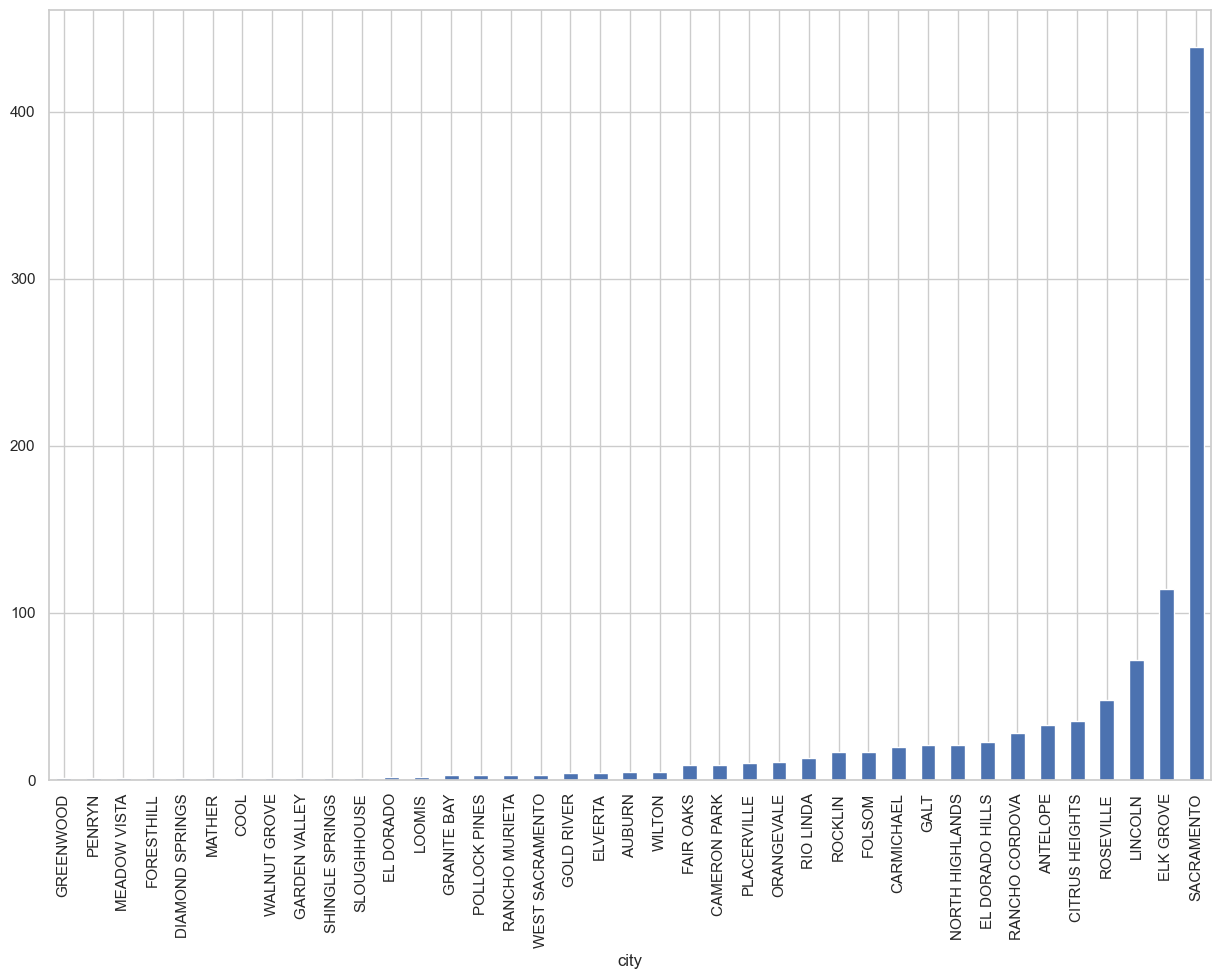

In [3]:
df['city'].value_counts().sort_values().plot(kind='bar', figsize=(15,10));

In [8]:
df[df['beds']==3]['sq__ft'].describe()

count     413.000000
mean     1334.598063
std       506.227604
min         0.000000
25%      1124.000000
50%      1306.000000
75%      1516.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [7]:
condition1 = (df['sq__ft']==0)
condition2 = (df['beds']==3) 
df.loc[condition1 & condition2, 'sq__ft']= 1306

In [10]:
df[(df['beds']==3)&(df['sq__ft']==0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names


In [37]:
df[df['beds']==4]['sq__ft'].describe()

count     258.000000
mean     1767.860465
std       782.377960
min         0.000000
25%      1448.000000
50%      1798.500000
75%      2165.000000
max      4400.000000
Name: sq__ft, dtype: float64

In [8]:
condition1 = (df['sq__ft']==0)
condition2 = (df['beds']==4) 
df.loc[condition1 & condition2, 'sq__ft']= 1798

In [39]:
df[(df['beds']==4)&(df['sq__ft']==0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names


In [10]:
df[df['beds']==2]['sq__ft'].describe()

count     133.000000
mean      957.248120
std       338.678144
min         0.000000
25%       832.000000
50%       950.000000
75%      1126.000000
max      1788.000000
Name: sq__ft, dtype: float64

In [9]:
condition1 = (df['sq__ft']==0)
condition2 = (df['beds']==2) 
df.loc[condition1 & condition2, 'sq__ft']= 950

In [42]:
df[(df['beds']==2)&(df['sq__ft']==0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names


In [43]:
df[df['beds']==5]['sq__ft'].describe()

count      59.000000
mean     2451.406780
std      1255.884633
min         0.000000
25%      2256.000000
50%      2787.000000
75%      3411.000000
max      4246.000000
Name: sq__ft, dtype: float64

In [10]:
condition1 = (df['sq__ft']==0)
condition2 = (df['beds']==5) 
df.loc[condition1 & condition2, 'sq__ft']= 2787

In [45]:
df[(df['beds']==5)&(df['sq__ft']==0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names


In [48]:
df[(df['beds']==0)&(df['sq__ft']==0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880,SERASPICT
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970,KARITSAAVE
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141,CONSERVANCYWAY
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600,DUSTYROSEWAY
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965,SMOKESTACKWAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277,TOPANGALNUnit
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609,POPLARAVE
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222,TOPANGALNUnit
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539,PENNSYLVANIAAVE


In [14]:
df[(df['sq__ft']==0)&(df['beds']!=0)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.05958,JUMELCT


In [15]:
df[df['beds']==6]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580,JUMELCT
648,8198 STEVENSON AVE,SACRAMENTO,95828,CA,6,4,2475,Multi-Family,Fri May 16 00:00:00 EDT 2008,159900,38.465271,-121.404260,STEVENSONAVE
779,9452 RED SPRUCE WAY,ELK GROVE,95624,CA,6,3,2555,Residential,Fri May 16 00:00:00 EDT 2008,300000,38.404505,-121.346938,REDSPRUCEWAY


In [53]:
df[df['beds']==6].describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,3.000000,3.0,3.0,3.000000,3.000000,3.000000,3.000000
mean,95738.000000,6.0,4.0,1676.666667,429966.666667,38.513236,-121.270259
std,104.096109,0.0,1.0,1452.586773,353450.142642,0.139062,0.184691
min,95624.000000,6.0,3.0,0.000000,159900.000000,38.404505,-121.404260
25%,95693.000000,6.0,3.5,1237.500000,229950.000000,38.434888,-121.375599
50%,95762.000000,6.0,4.0,2475.000000,300000.000000,38.465271,-121.346938
75%,95795.000000,6.0,4.5,2515.000000,565000.000000,38.567601,-121.203259
max,95828.000000,6.0,5.0,2555.000000,830000.000000,38.669931,-121.059580


In [11]:
condition1 = (df['sq__ft']==0)
condition2 = (df['beds']==6) 
df.loc[condition1 & condition2, 'sq__ft']= 2475

<Axes: ylabel='type'>

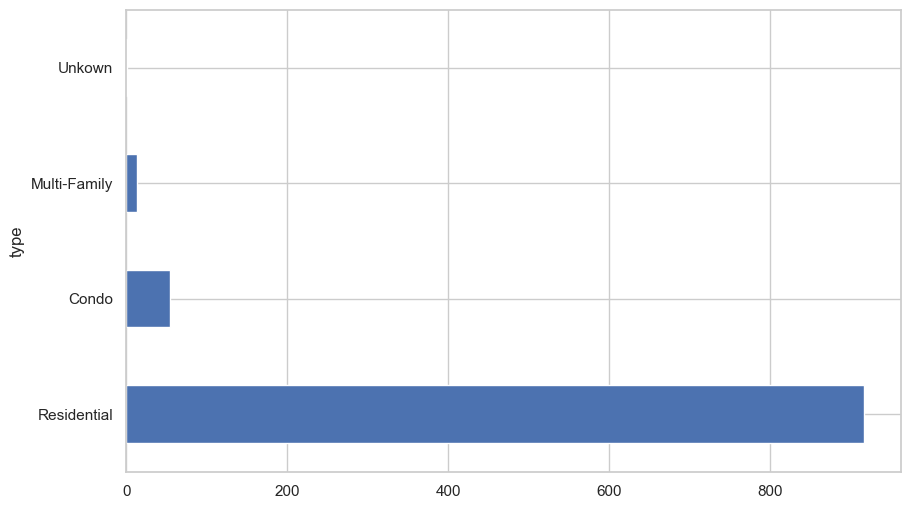

In [17]:
df['type'].value_counts().plot(kind= 'barh')

In [18]:
df[df['type']=='Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183,MARYBELLELN


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1427.064975,799.097391,0.000000,1051.000000,1351.000000,1798.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [19]:
df[df['price'] == 1551]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,1306,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742,VISTADEMADERA


In [81]:
df[(df['city']=='LINCOLN')&(df['sq__ft']==1306)].describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,3.0,3.0,3.000000,3.0,3.000000,3.000000,3.000000
mean,95648.0,3.0,2.333333,1306.0,3781.666667,38.874514,-121.270769
std,0.0,0.0,0.577350,0.0,1931.814001,0.019806,0.033799
min,95648.0,3.0,2.000000,1306.0,1551.000000,38.851645,-121.290285
25%,95648.0,3.0,2.000000,1306.0,3224.000000,38.868719,-121.290283
50%,95648.0,3.0,2.000000,1306.0,4897.000000,38.885794,-121.290281
75%,95648.0,3.0,2.500000,1306.0,4897.000000,38.885949,-121.261011
max,95648.0,3.0,3.000000,1306.0,4897.000000,38.886104,-121.231742


In [12]:
df.loc[df['price'] == 1551 , 'price']= 3781.666667

C:\Users\samhe\AppData\Local\Temp\ipykernel_8\3285220705.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3781.666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['price'] == 1551 , 'price']= 3781.666667


In [13]:
df[df['price'] == 1551]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names


In [16]:
df['price'].min()

2000.0

In [23]:
df[df['price']!=2000].describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,95750.766260,2.911585,1.774390,1422.598577,234382.449864,38.607851,-121.356213
std,85.191999,1.308594,0.893013,787.106585,138234.045470,0.145459,0.138159
min,95603.000000,0.000000,0.000000,0.000000,3781.666667,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,1051.000000,145000.000000,38.482714,-121.446157
50%,95762.000000,3.000000,2.000000,1351.000000,214375.000000,38.626627,-121.376277
75%,95828.000000,4.000000,2.000000,1798.000000,300000.000000,38.695611,-121.295804
max,95864.000000,8.000000,5.000000,4400.000000,884790.000000,39.020808,-120.597599


In [22]:
df.loc[df['sq__ft']==0 ,'type']= 'plot'

In [18]:
folium.Map()

In [27]:
m = folium.Map(location=[38.575764, -121.478851], tiles='OpenStreetMap', zoom_start=10)

for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)

display(m)                         

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


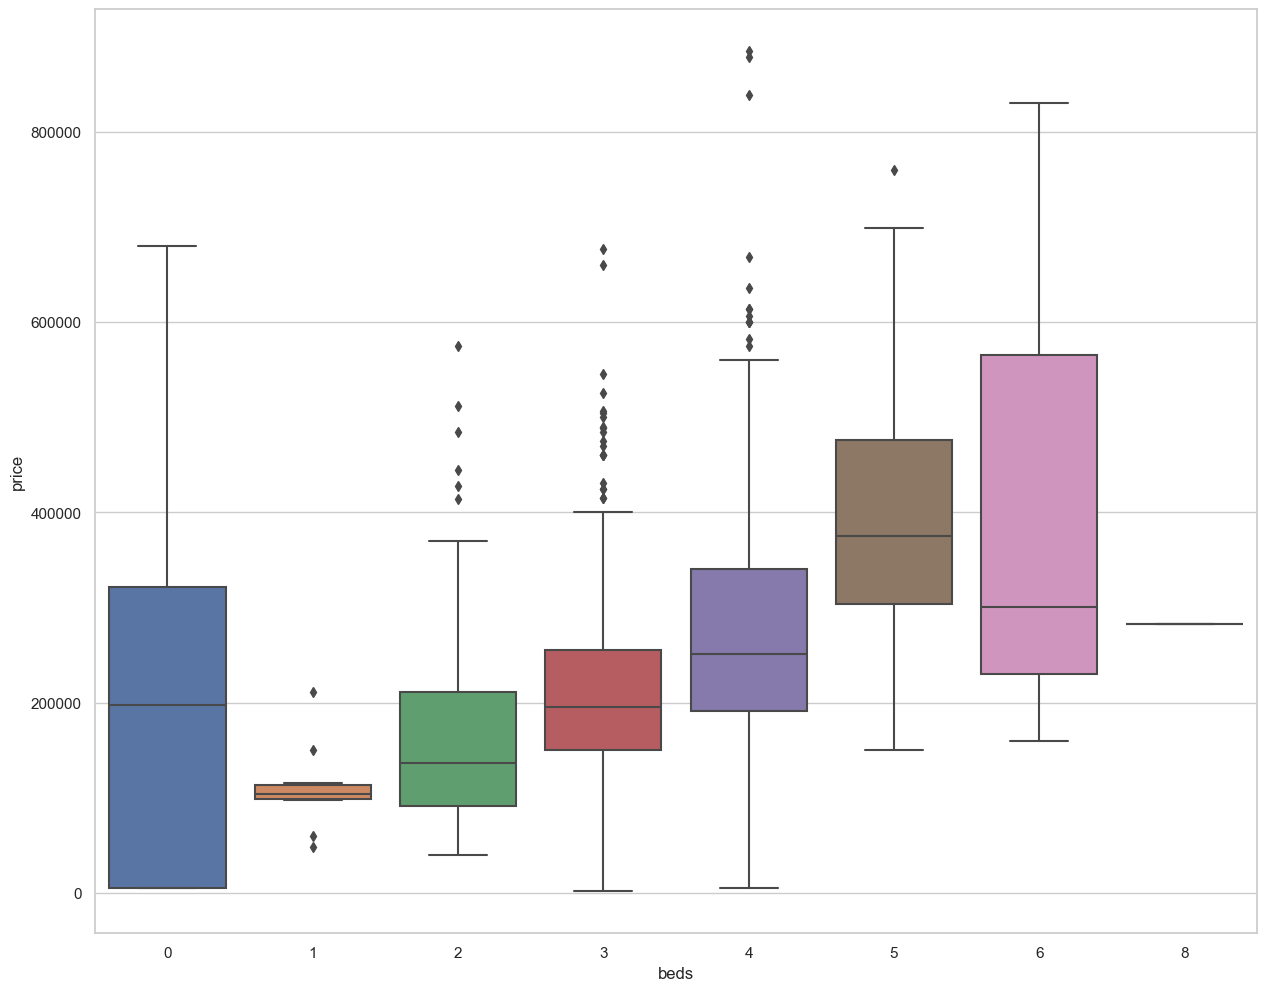

In [17]:
plt.figure(figsize=(15,12))
sns.boxplot(x='beds',y='price',data = df)
plt.show()

In [24]:
df[df['beds']==8]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,Wed May 21 00:00:00 EDT 2008,282400,38.559505,-121.364839,NORCADECIR


In [23]:
df[(df['zip']==95826)&(df['street_names']=='NORCADECIR')]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_names
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,Wed May 21 00:00:00 EDT 2008,282400.0,38.559505,-121.364839,NORCADECIR


In [47]:
df[['beds','baths', 'sq__ft','price']].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.823037,0.342035
baths,0.839650,1.000000,0.823498,0.416242
sq__ft,0.823037,0.823498,1.000000,0.527637
price,0.342035,0.416242,0.527637,1.000000


In [32]:
df[df.type != 'plot'][['beds','baths', 'sq__ft','price']].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.663497,0.687772,0.435324
baths,0.663497,1.000000,0.694291,0.511932
sq__ft,0.687772,0.694291,1.000000,0.644743
price,0.435324,0.511932,0.644743,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

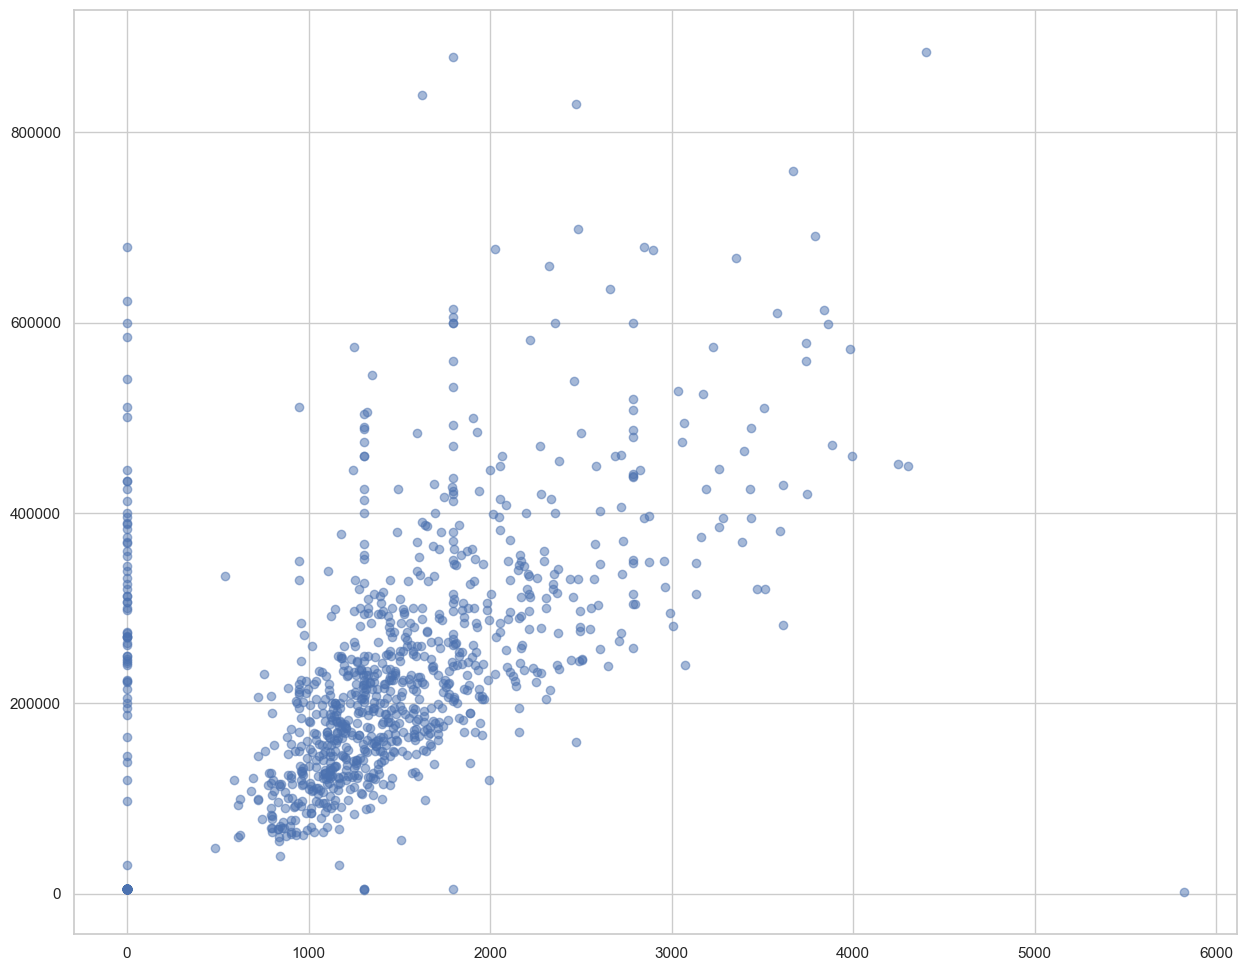

In [31]:
plt.figure(figsize=(15,12))
plt.scatter(df.sq__ft, df.price, alpha = 0.5)
plt.show

In [14]:
df_predict = df[df.type != 'plot'][['beds','baths', 'sq__ft','price']]

In [38]:
def draw_scatter_plot(X, Y):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')

    plt.show(); 

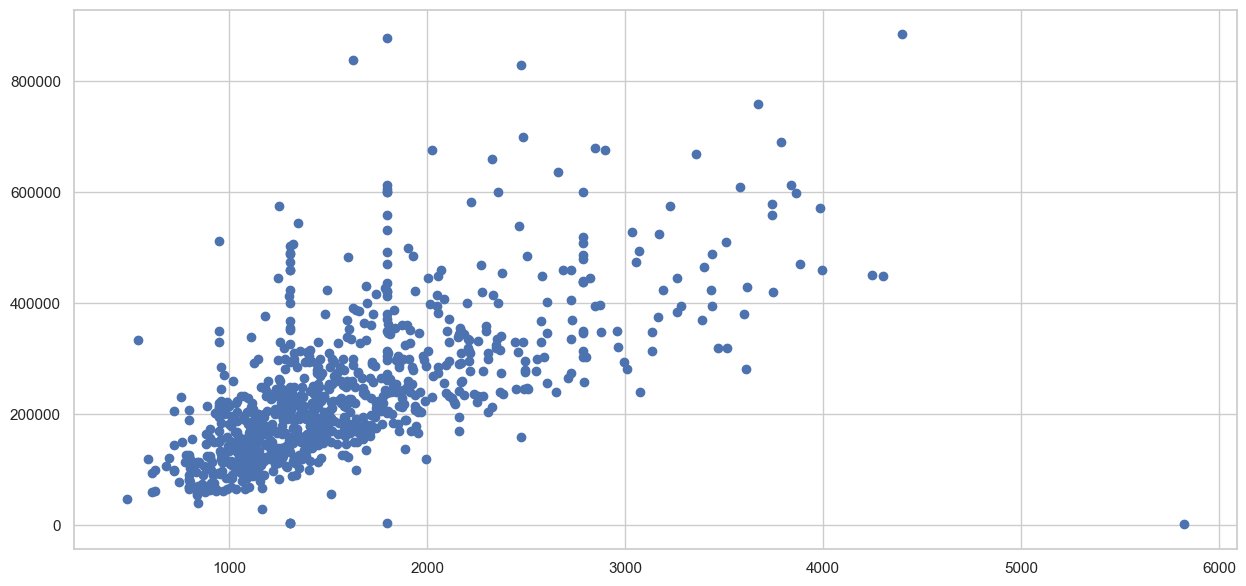

In [39]:
draw_scatter_plot(df_predict.sq__ft , df_predict.price)

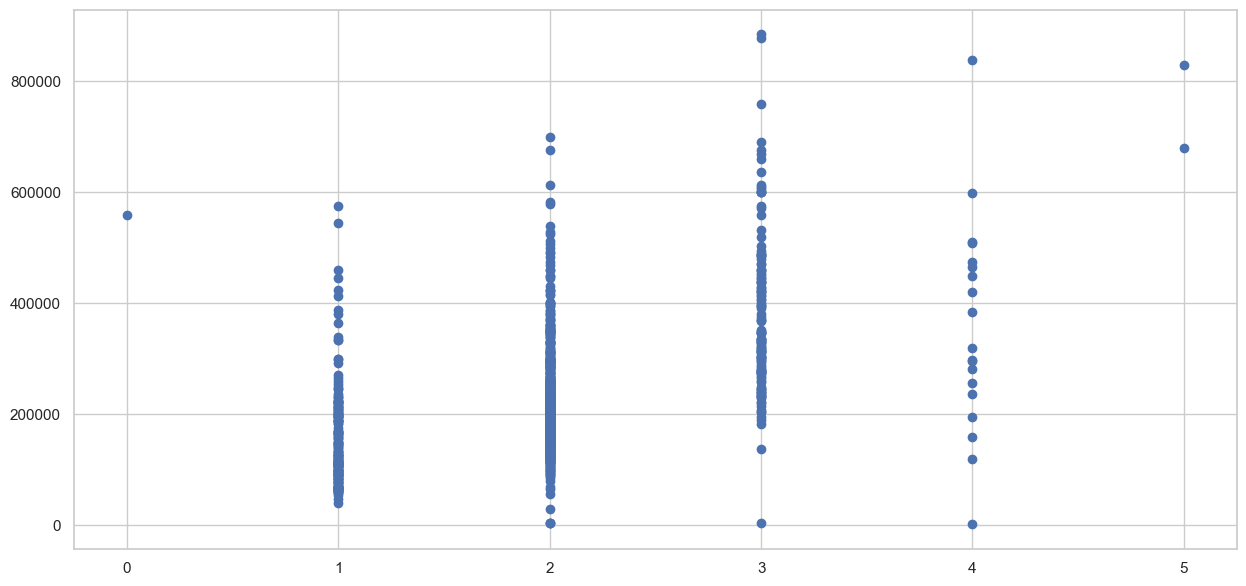

In [36]:
draw_scatter_plot(df_predict.baths , df_predict.price)

#### 2.2 List all possible variables which might be Predictor variable.

In [48]:
# ANSWER
#baths
#sq__ft


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [40]:
# ANSWER
df[df.type != 'plot'][['beds','baths', 'sq__ft','price']].corr()

,beds,baths,sq__ft,price
beds,1.000000,0.663497,0.687772,0.435324
baths,0.663497,1.000000,0.694291,0.511932
sq__ft,0.687772,0.694291,1.000000,0.644743
price,0.435324,0.511932,0.644743,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [15]:
df_predict['price'].mean()

234146.528595601

In [16]:
df['price'].mean()

234146.528595601

In [17]:
# ANSWER
df_predict['y_hat'] = df_predict['price'].mean()

In [18]:
X = df_predict['sq__ft']
Y =df_predict['price']
Yhat = df_predict['y_hat']

In [19]:
def draw_plot(X, Y, Yhat):
    ### Plot the data
    # create a figure
    fig = plt.figure(figsize=(15,7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, Y, c='b')
    ax.plot(X, Yhat, color='r');

    plt.show();

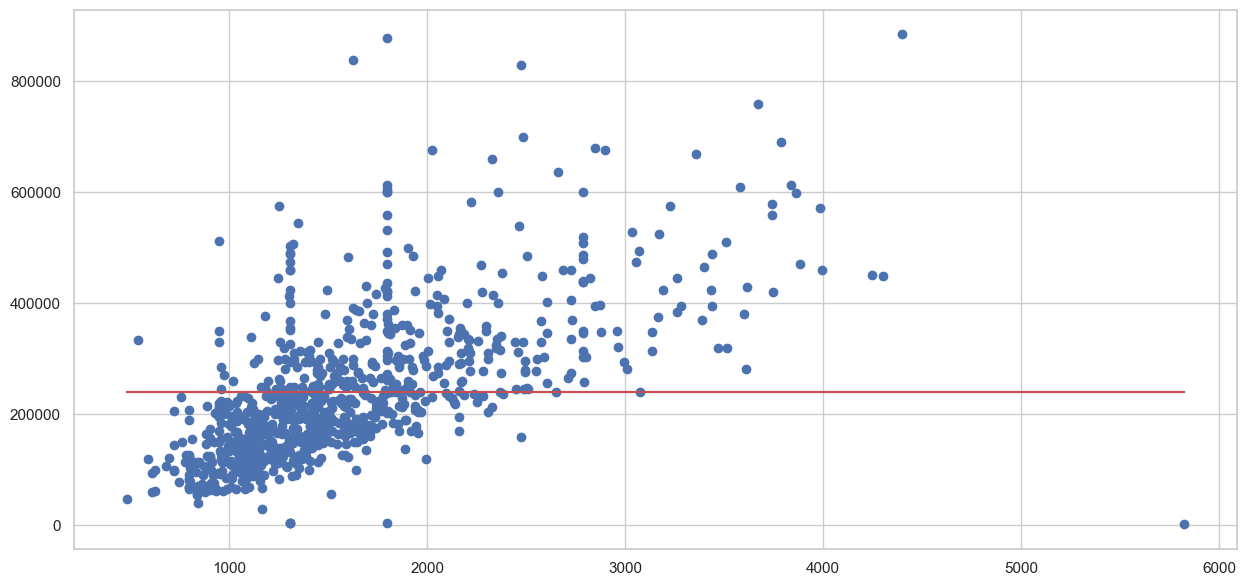

In [56]:
 draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [20]:
# ANSWER
res = abs(df_predict['price'] - df_predict['y_hat']).mean()
res


103450.2796897624

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [21]:
# ANSWER
X = df_predict['sq__ft']
Y = df_predict['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [22]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))

    beta_1 = n/d

    return beta_1

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [23]:
# ANSWER
beta_1 = calculate_beta_1(X, Y)
beta_1

91.35928198195445

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [24]:
# ANSWER
def calculate_beta_0(X, Y):

    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar

    return beta_0

In [25]:
beta_0 = calculate_beta_0(X, Y)
beta_0

103770.89717278667

In [26]:
def calculate_yhat(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

In [27]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      180147.256910
1      210387.179246
2      176492.885630
3      181609.005421
4      176584.244912
           ...      
980    312070.060092
981    238708.556660
982    214863.784063
983    257711.287312
984    228202.239232
Name: sq__ft, Length: 985, dtype: float64

In [28]:
calculate_yhat(2000, beta_0, beta_1)

286489.4611366956

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [29]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [30]:
# ANSWER
resi = calculate_residual(Y, Yhat)
abs(resi)

0      120925.256910
1      142175.179246
2      107612.885630
3      112302.005421
4       94684.244912
           ...      
980     79645.060092
981      4708.556660
982     20136.215937
983     22410.287312
984      7535.760768
Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

In [31]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [32]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [33]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [34]:
# ANSWER
calculate_r_square(Y, np.mean(Y))

0.0

In [35]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.2784010226740967

##### 2.7.F [BONUS] Draw Plot of Predicted Line

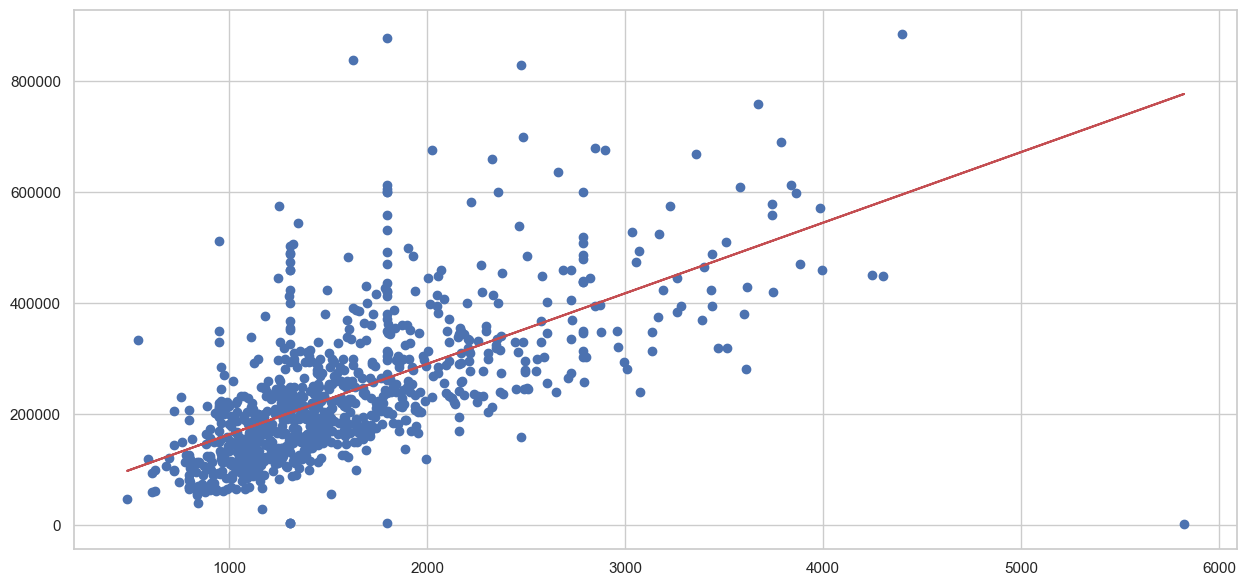

In [67]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [36]:
df_predict['Yhat'] = Yhat

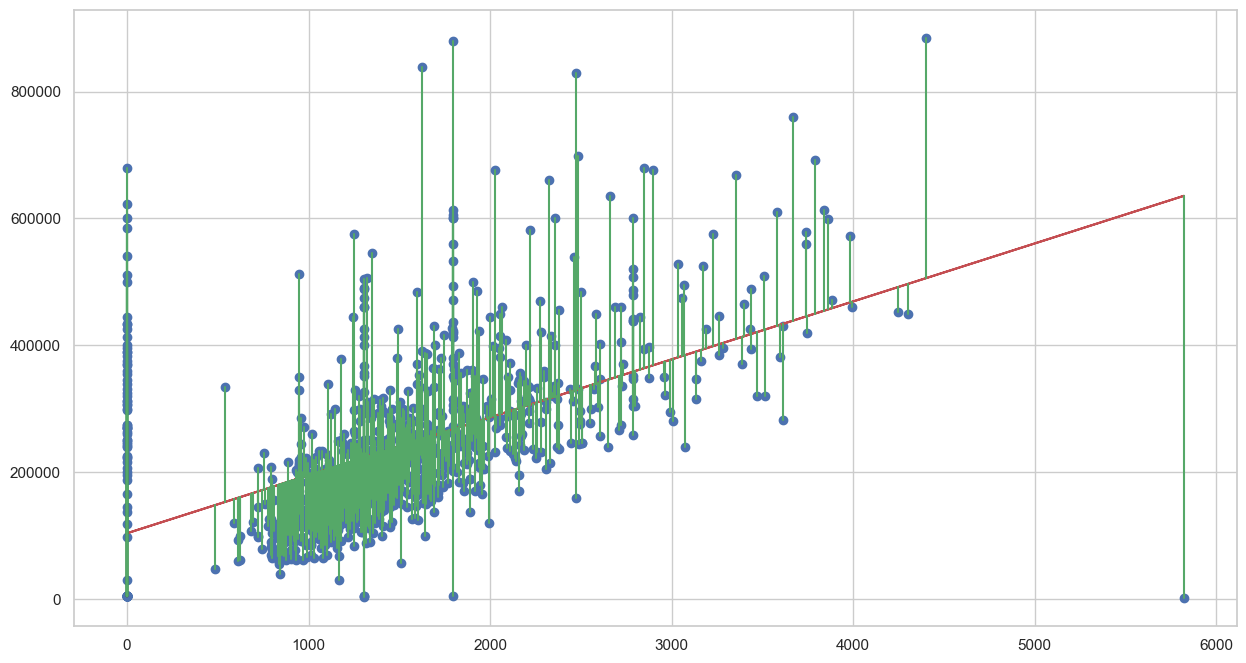

In [37]:
# ANSWER
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in df_predict.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

In [38]:
X=df_predict[['sq__ft','baths']]
Y=df_predict['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.coef_, linreg.intercept_)


[   91.52629791 -6534.37144339] 114866.81865260711


C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

In [40]:
linreg.score(X_test, y_test)

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

0.354978115733929

In [41]:
y_preds = linreg.predict(X_test)

y_preds[:10]

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([230941.68211869, 114866.81865261, 221331.420838  , 214797.04939461,
       204307.5294265 , 240551.94339938, 240277.36450565, 114866.81865261,
       395561.48776946, 188748.05878158])

In [45]:
from sklearn.metrics import mean_squared_error

a= mean_squared_error(y_test, y_preds, squared=True)

C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\samhe\anaconda3\envs\iod\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [46]:
np.sqrt(a)

118357.26602176338

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



